### group members
* Max Dunger
* [Yannik Motzet](mailto:yannik.motzet@outlook.com)

# Übung 2: Hauptkomponentenanalyse
## 1. Implementierung der Hauptkomponentenanalyse

In [ ]:
import numpy as np
import pandas as pd
np.__version__, pd.__version__, 

('1.18.5', '1.1.4')

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
cols = ['CRIM', 'ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','TGT']
boston_raw = pd.read_csv(url, sep =' ', skipinitialspace = True , header = None, names = cols , index_col = False)
boston_raw

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TGT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


1. Zentrierung

In [ ]:
def intrinsic_value(X):
  dim_n = X.shape[0]
  mean= np.mean(X, axis=0)
  std= np.std(X, axis=0)
  X_std = (X-mean)/std
  u, d, vt = np.linalg.svd(X_std)
  eigenwerte = d**2/(dim_n-1)
  return eigenwerte, X_std, u, d, vt


In [ ]:
result = pd.DataFrame(columns=["Eigenw. Covarianz-Matrix", "Erklärte Varianz", "Kumulative Erklärte Varianz"])

In [ ]:
eigenwerte, X_std, u, d, vt = intrinsic_value(boston_raw)
eigenwerte

result.iloc[:, 0] = eigenwerte

Erlärte Varianz

In [ ]:
gesamtvarianz = sum(eigenwerte)
erklaerte_varianz = [(i / gesamtvarianz) for i in eigenwerte]

result.iloc[:, 1] = erklaerte_varianz

In [ ]:
result

,Eigenw. Covarianz-Matrix,Erklärte Varianz,Kumulative Erklärte Varianz
0,6.558952,0.467571,NaN
1,1.652798,0.117824,NaN
2,1.351577,0.096350,NaN
3,0.888295,0.063324,NaN
4,0.852584,0.060779,NaN
5,0.661318,0.047144,NaN
6,0.536471,0.038244,NaN
7,0.403875,0.028791,NaN
8,0.277813,0.019805,NaN
9,0.252757,0.018018,NaN


Kumulative erlärte Varianz

In [ ]:
kumulative_erklaerte_varianz = []

for i in range(len(erklaerte_varianz)):
  if i == 0:
    kumulative_erklaerte_varianz.append(erklaerte_varianz[i])
  else:
    kumulative_erklaerte_varianz.append(kumulative_erklaerte_varianz[i-1]+erklaerte_varianz[i])

result.iloc[:, 2] = kumulative_erklaerte_varianz

In [ ]:
result

,Eigenw. Covarianz-Matrix,Erklärte Varianz,Kumulative Erklärte Varianz
0,6.558952,0.467571,0.467571
1,1.652798,0.117824,0.585394
2,1.351577,0.096350,0.681745
3,0.888295,0.063324,0.745069
4,0.852584,0.060779,0.805848
5,0.661318,0.047144,0.852991
6,0.536471,0.038244,0.891235
7,0.403875,0.028791,0.920026
8,0.277813,0.019805,0.939831
9,0.252757,0.018018,0.957849


#### Fehler bei Dimensionsreduktion
10\%: die letzten 6 Dimensionen kann man weg lassen \\
5\%: die letzten 4 Dimensionen kann man weg lassen \\
1\%: die letzte Dimensionen kann man weg lassen \\

c.) Korrelationskoeffizienten der Projektionen auf die ersten drei Hauptkomponenten

In [ ]:
d_richtig = np.zeros((X_std.shape[0], X_std.shape[1]))
for i in range(14):
  d_richtig[i, i] = d[i]
# print(d_richtig[13, 13])
# print(d[13])
print(d_richtig.shape)

(506, 14)


In [ ]:
ud = np.dot(u, d_richtig)
ud.shape

(506, 14)

In [ ]:
projection_3 = ud[:, 0:3]
projection_3.shape

(506, 3)

In [ ]:
v = vt.T
projection_3_old = np.dot(X_std, v[:, 0:3])

In [ ]:
projection_3_df_old = pd.DataFrame(data=projection_3, columns=["1", "2", "3"])
projection_3_df_old.corr()

projection_3_df = pd.DataFrame(data=projection_3, columns=["1", "2", "3"])
projection_3_df.corr()

,1,2,3
1,1.000000e+00,1.128022e-16,-5.989757e-16
2,1.128022e-16,1.000000e+00,-1.315001e-16
3,-5.989757e-16,-1.315001e-16,1.000000e+00


In [ ]:
projection_3.shape

(506, 3)

In [ ]:
projection_3_df_old.corr()

,1,2,3
1,1.000000e+00,1.128022e-16,-5.989757e-16
2,1.128022e-16,1.000000e+00,-1.315001e-16
3,-5.989757e-16,-1.315001e-16,1.000000e+00


Ergebnis: kaum Korrelation zwischen den neuen Variablen

d.) Scatterplot

In [ ]:
# add tgt to projection dataframe
tgt_df = pd.DataFrame(data=X_std, columns=["TGT"])
projection_3_df.insert(0, "TGT", tgt_df, True)

In [ ]:
boston_median = projection_3_df['TGT'].median()
boston_median

-0.14505927833706728

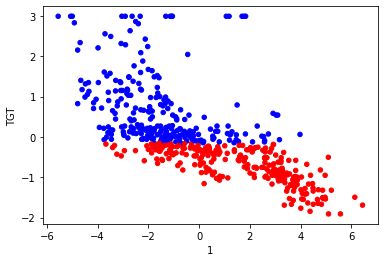

In [ ]:
color = np.where(projection_3_df["TGT"]<boston_median, 'r', 'b')

projection_3_df.plot.scatter(x='1', y='TGT', c=color)

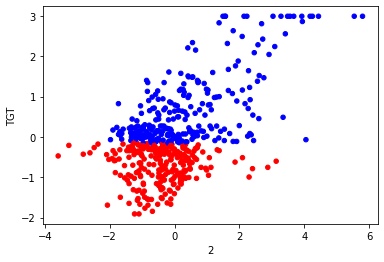

In [ ]:
projection_3_df.plot.scatter(x='2', y='TGT', c=color)

In [ ]:
Ergebnis: linearer Zusammenhang erkennbar mit den neuen Variablen und TGT

\\

\\

\\

\\

\\

\\

\\

\\

---

In [ ]:
d_richtig = np.zeros((boston.shape[0], boston.shape[1]))
for i in range(14):
  d_richtig[i, i] = d[i]
print(d_richtig[13, 13])
print(d[13])
print(d_richtig.shape)

5.524969597469402
5.524969597469402
(506, 14)


In [ ]:
# d_richtig = np.diag(d)
# d_richtig.shape

In [ ]:
ud = np.dot(u, d_richtig)
ud[0]

In [ ]:
np.dot(np_boston[0], v.T[:, 0:10])

NameError: ignored